In [1]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import SimpleRNN, LSTM, GRU 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using Keras version: 2.12.0 backend: tensorflow


In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [5]:
print('MNIST data loaded: train:',len(x_train),'test:',len(x_test))
print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', y_train.shape)

MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
Y_train: (60000,)


In [ ]:
# Plot the first few images
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


In [ ]:
# Plot a histogram of pixel values
plt.hist(x_train.ravel(), bins=256, range=(0,255), histtype='step')
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot a heatmap of pixel values
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='hot')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

In [9]:
# Normalize the input data
X_train = x_train / 255.0
X_test = x_test / 255.0

In [20]:
print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('Y_test:', y_test.shape)


MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
Y_test: (10000,)


In [15]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras
import keras.utils

from keras import utils as np_utils

In [13]:
# Define the RNN model

In [16]:
model = keras.models.Sequential([
  keras.layers.SimpleRNN(units=128, input_shape=(28, 28)),
  keras.layers.Dense(units=10, activation='softmax')
])

In [17]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               20096     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________
None


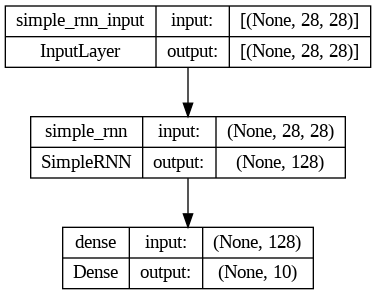

In [18]:
#  plot the model 
from keras.utils import plot_model
keras.utils.plot_model(model, show_shapes=True)

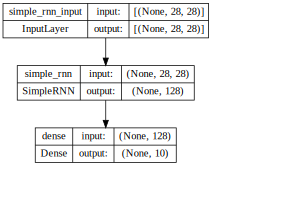

In [19]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))


Compile model with optimizer: Adam and loss : CrossEntropy

---



In [21]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1470 - accuracy: 0.9583 - val_loss: 0.1588 - val_accuracy: 0.9529
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1413 - accuracy: 0.9603 - val_loss: 0.1419 - val_accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1381 - accuracy: 0.9599 - val_loss: 0.1291 - val_accuracy: 0.9633
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1299 - accuracy: 0.9629 - val_loss: 0.1187 - val_accuracy: 0.9666
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1332 - accuracy: 0.9622 - val_loss: 0.1358 - val_accuracy: 0.9628
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1324 - accuracy: 0.9629 - val_loss: 0.1487 - val_accuracy: 0.9590
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1353 - accuracy: 0.9617 - val_loss: 0.1407 -

In [24]:
# accurcy
score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.17132176458835602
Test accuracy: 0.9476333260536194


Text(0.5, 1.0, 'loss')

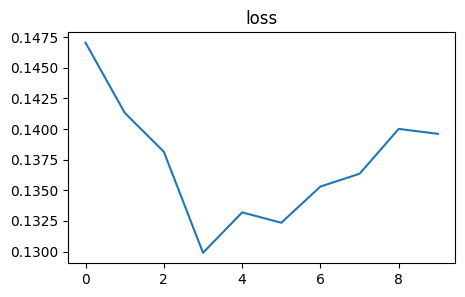

In [25]:
# loss fig 
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

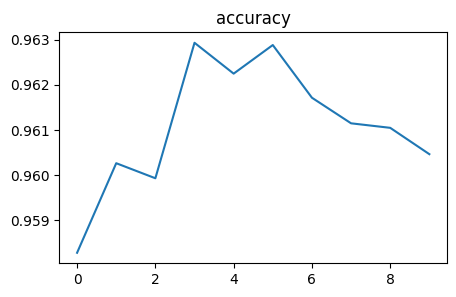

In [27]:
# accurcy fig
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

# CNN Version

In [28]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [29]:
# CNN Version

# Reshape the data to have single channel (gray scale)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [30]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000,)


In [31]:
# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [32]:

# One-hot encode the labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [34]:
modelcnn = Sequential()

# Convolution layer with 32 filters and 3x3 kernel size
modelcnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Max pooling layer with 2x2 pool size
modelcnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
modelcnn.add(Flatten())

# Fully connected layer with 128 neurons
modelcnn.add(Dense(128, activation='relu'))

# Output layer with 10 neurons for 10 classes
modelcnn.add(Dense(num_classes, activation='softmax'))



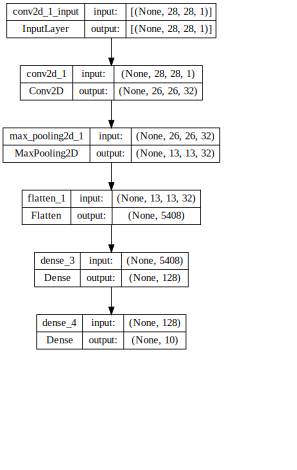

In [35]:
SVG(model_to_dot(modelcnn, show_shapes=True).create(prog='dot', format='svg'))


using cross entropy

In [38]:
modelcnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [40]:
historycnn = modelcnn.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 39s 84ms/step - loss: 0.1568 - accuracy: 0.9538 - val_loss: 0.0886 - val_accuracy: 0.9721
Epoch 2/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0653 - accuracy: 0.9807 - val_loss: 0.0623 - val_accuracy: 0.9796
Epoch 3/10
469/469 [==============================] - 34s 71ms/step - loss: 0.0456 - accuracy: 0.9863 - val_loss: 0.0481 - val_accuracy: 0.9834
Epoch 4/10
469/469 [==============================] - 34s 74ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0431 - val_accuracy: 0.9852
Epoch 5/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0420 - val_accuracy: 0.9862
Epoch 6/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0488 - val_accuracy: 0.9834
Epoch 7/10
469/469 [==============================] - 41s 87ms/step - loss: 0.0133 - accuracy: 0.9962 - val_loss: 0.0416 - val_accuracy:

In [41]:
score = modelcnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04067683592438698
Test accuracy: 0.9871000051498413


Text(0.5, 1.0, 'loss')

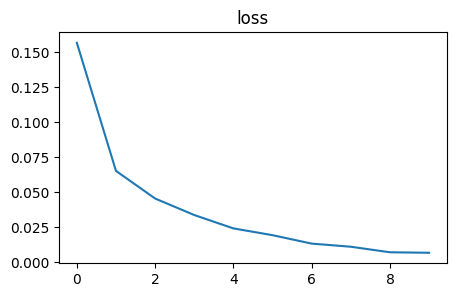

In [42]:
# loss fig 
plt.figure(figsize=(5,3))
plt.plot(historycnn.epoch,historycnn.history['loss'])
plt.title('loss')

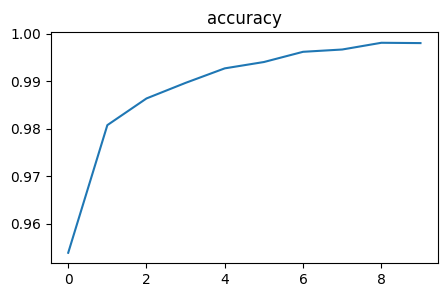

In [43]:
# accurcy fig
plt.figure(figsize=(5,3))
plt.plot(historycnn.epoch,historycnn.history['accuracy'])
plt.title('accuracy');